# Predicting the Age of Abalone

## Phase 2: Statistical Modeling

#### Group Name: Group 63

#### Name(s) & ID(s) of Group Members: Puneet Kaur Grewal (s3900991)

#### 

## Table of Contents
* [Introduction](#intro) 
  + [Phase 1 Summary](#p1summary)
  + [Report Overview](#reportoverview)
  + [Overview of Methodology](#method)
* [Statistical Modelling](#stat_modelling)
  + [Model Overview](#modeloverview)
  + [Model Fitting](#modelfitting)
* [Critique and Limitations](#limit)
* [Summary and Conclusions](#summ_conc)
  + [Project Summary](#projectsummary)
  + [Summary of Findings](#findings)
  + [Conclusions](#conc)
* [References](#ref)


## Introduction <a id='intro'></a>

### Phase 1 Summary <a id='p1summary'></a>

During Phase 1 we first changed the column names to remove white spaces and change letters to lowercase. We then checked to see if the `whole_weight` column was dependent on the other features. It was found that the total of the other weight features did not equal `whole_weight`, and therefore it was decided to keep this feature. A potential error was also found as the `height` column had a '0' value which is not possible, so this row was removed. The cleaned data produced in Phase 1 will be used during statistical modeling in this Phase 2 report.

While exploring the data we found that the response variable, `rings`, was right skewed with potential outliers. We also found that all the features had a positive relationship with `rings`. This suggests that as the physical measurements of an abalone increases, so does the number of rings. Although the relationship was positive, the strength of the association did not appear to be extremely strong. It was also found that male and female abalone had similar physical measurements, unlike infants who appeared to be smaller. We also compared the association of different weights to number of rings. It was shown through the scatter plots that `viscera_weight` and `shell_weight` had a stronger and more linear association than the other weight measurements. This highlights that these weight features would perhaps be able to better predict rings compared to the other weight features. The data exploration section was important as it allows us to better understand the multiple linear regression model which will be produced in this Phase 2 report. 

### Report Overview <a id='reportoverview'></a>

This report will see if physical measurements and gender are an effective way to predict the number of rings on an abalone which can be used to figure out their age. In this Phase 2 Report we will first create a full model to see how all the current features can be used to predict the response variable, `rings`. Diagnostic checks will then be performed to check if the full model meets the required conditions. From here, backwards feature selection will be performed to remove any variables with non-significant p-values. A new reduced model will then be created which will have contain all significant features. During this process, diagnostic checks will be conducted to see if the model violates any conditions. If any of the conditions appear to be violated, this will be reported in the critiques and limitations section of the report. All the results from the statistical modeling will then be summarised and appropriate conclusions will then be drawn.

### Overview of Methodology <a id='method'></a>

During statistically modeling, the cleaned dataset from Phase 1 will first be imported. We will then construct a regression formula using the current features in the cleaned dataset. As there is a categorical feature, `gender`, in this dataset, one-hot encoding will need to be performed. From here, a new regression formula will be created using the new one-hot encoded features.

We will then create an OLS (ordinary least squares) model with our encoded data. This with provide us with information such as the R-Squared and adjusted R-Square values. It will also give us an insight into the p-values of the different features which will let us know which ones are significant (p > 0.05) and which ones are not.  A new data frame for the actual number of rings on an abalone versus the predicted number of rings will then be created. This data frame will be used when plotting graphs to do diagnostic checks and to see how well this model predicts the number of rings on an abalone. A scatter plot for actual versus predicted rings will be constructed with this new data frame. The diagnostic checks will see if the residuals have constant variability and are nearly normal.

Backwards feature selection will then be conducted to remove any features with insignificant p-values. This will help to construct the reduced model. This reduced model will also produce OLS Regression Results which will provide information including p-values, the R-Squared and adjusted R-Squared values. Similarly to the full model, another data frame will be created for the actual and predicted number of rings on an abalone. A scatter plot will then be created using this new data frame for the actual versus predicted rings on an abalone for the reduced model to conduct diagnostic checks.

## Statistical Modelling <a id='stat_modelling'></a>

In [1]:
# Code sourced from www.featureranking.com 
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import io
import requests

pd.set_option('display.max_columns', None) 

###
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

### Model Overview <a id='modeloverview'></a>

We will first fit a multiple linear regression model that predicts age using the number of rings using all of the available features. This is known as the full model. First let's take a quick look at the first 5 rows of the clean data that was created in Phase 1. 

In [2]:
abolone_df = pd.read_csv('Phase2_Group63.csv')
abolone_df.head(5).style.set_precision(3)

,gender,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.514,0.225,0.101,0.150,15
1,M,0.350,0.265,0.090,0.226,0.100,0.049,0.070,7
2,F,0.530,0.420,0.135,0.677,0.257,0.141,0.210,9
3,M,0.440,0.365,0.125,0.516,0.215,0.114,0.155,10
4,I,0.330,0.255,0.080,0.205,0.089,0.040,0.055,7


The regression formula has been constructed below using string functions. 

In [3]:
formula_string_features = ' + '.join(abolone_df.drop(columns='rings').columns)
formula_string = 'rings ~ ' + formula_string_features
print('formula_string: ', formula_string)

formula_string:  rings ~ gender + length + diameter + height + whole_weight + shucked_weight + viscera_weight + shell_weight


In order to get all the features being used in this regression model, one hot encoding needs to be conducted first for `gender`.

In [4]:
abolone_encoded = pd.get_dummies(abolone_df, drop_first = True)
abolone_encoded.head().style.set_precision(3)

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,gender_I,gender_M
0,0.455,0.365,0.095,0.514,0.225,0.101,0.150,15,0,1
1,0.350,0.265,0.090,0.226,0.100,0.049,0.070,7,0,1
2,0.530,0.420,0.135,0.677,0.257,0.141,0.210,9,0,0
3,0.440,0.365,0.125,0.516,0.215,0.114,0.155,10,0,1
4,0.330,0.255,0.080,0.205,0.089,0.040,0.055,7,1,0


The new regression formula for the encoded dataset is shown below and added features have also been put into the correct format required for model fitting.

In [5]:
formula_string_features_encoded = ' + '.join(abolone_encoded.drop(columns='rings').columns)
formula_string_encoded = 'rings ~ ' + formula_string_features_encoded
print('formula_string: ', formula_string_encoded)

formula_string:  rings ~ length + diameter + height + whole_weight + shucked_weight + viscera_weight + shell_weight + gender_I + gender_M


### Model Fitting <a id='modelfitting'></a>

Now that the statistical model formula has been defined, we fit an OLS (ordinary least squares) model to our encoded data to provide us with more information about the data.

In [6]:
model_full = sm.formula.ols(formula=formula_string_encoded, data=abolone_encoded)
###
model_full_fitted = model_full.fit()
###
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  rings   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     538.6
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:31:16   Log-Likelihood:                -9199.9
No. Observations:                4175   AIC:                         1.842e+04
Df Residuals:                    4165   BIC:                         1.848e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.9086      0.292     13.

The full model has an adjusted R-squared value of 0.537 suggesting that only 53.7% of the variability in `rings` is explained by this model. Most of the p-values are significant as they have a value of '0.00'. The only two insignificant variables are `length` and `gender_M` as they have p-values greater than 0.05. 

We will now define define a new data frame for the actual number of rings on an abalone versus the predicted number of rings. This data frame will be used when plotting the predicted values and the regression residuals. 

In [7]:
residuals_full = pd.DataFrame({'actual rings': abolone_encoded['rings'], 
                            'predicted rings': model_full_fitted.fittedvalues, 
                            'residual': model_full_fitted.resid})
residuals_full.head(5).style.set_precision(3)

,actual rings,predicted rings,residual
0,15,9.221,5.779
1,7,7.851,-0.851
2,9,11.093,-2.093
3,10,9.653,0.347
4,7,6.735,0.265


We will now plot actual number of rings versus predicted number of rings.

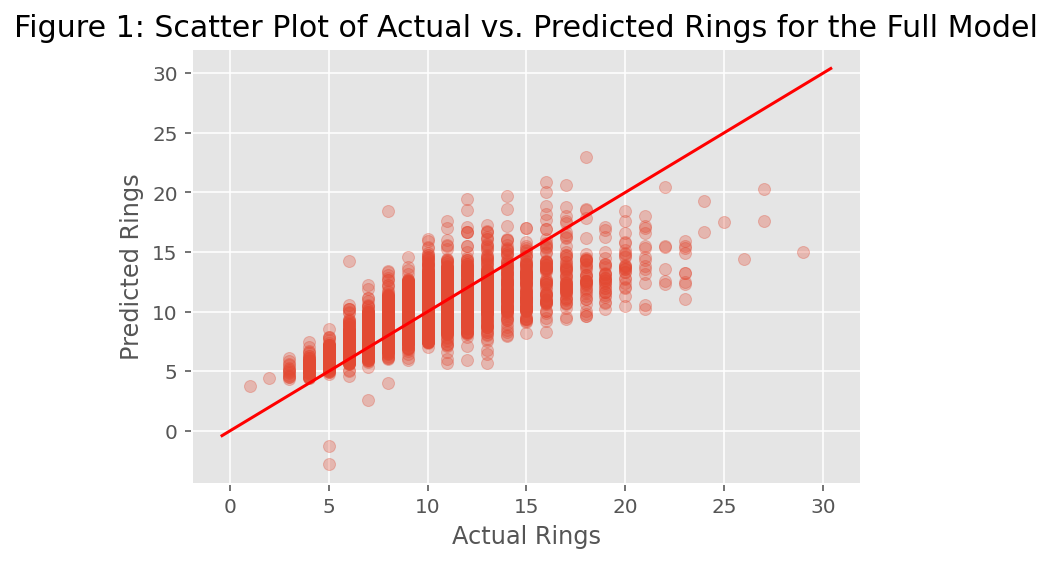

In [8]:
# code sourced from www.featureranking.com
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
# Creating scatter plot
plt.scatter(residuals_full['actual rings'], residuals_full['predicted rings'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Rings');
plt.ylabel('Predicted Rings');
plt.title('Figure 1: Scatter Plot of Actual vs. Predicted Rings for the Full Model', fontsize=15);
plt.show();

From Figure 1 we can see that the model does not produce a prediction above 25 rings, despite the maximum number of rings being 29. The model also predicts a negative number of rings which is not realistically possible.

#### Full Model Diagnostic Checks

The diagnostics will now be checked for the full model through the use of graphs to check if the necessary conditions are met.

First we will plot residuals against the predicted rings. 

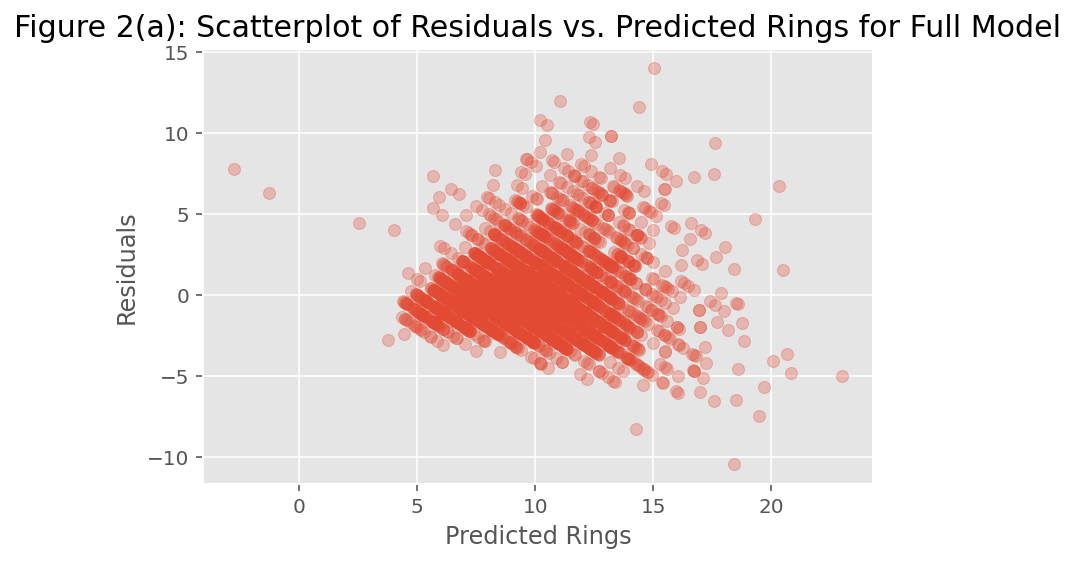

In [9]:
# code sourced from www.featureranking.com
plt.scatter(residuals_full['predicted rings'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Predicted Rings');
plt.ylabel('Residuals')
plt.title('Figure 2(a): Scatterplot of Residuals vs. Predicted Rings for Full Model', fontsize=15)
plt.show();

From Figure 2(a) we can see that for lower predicted rings the distance between residual data points is quite small. This distance gets progressively larger as the predicted age increases. For low predicted rings the residuals are mainly below zero and as the number f rings increases the residuals are mainly above zero. This suggests that the residuals are not random and centered around 0 indicating the constant variability assumption of linear regression is not satisfied in this case. 

We will now plot residuals against the actual rings.

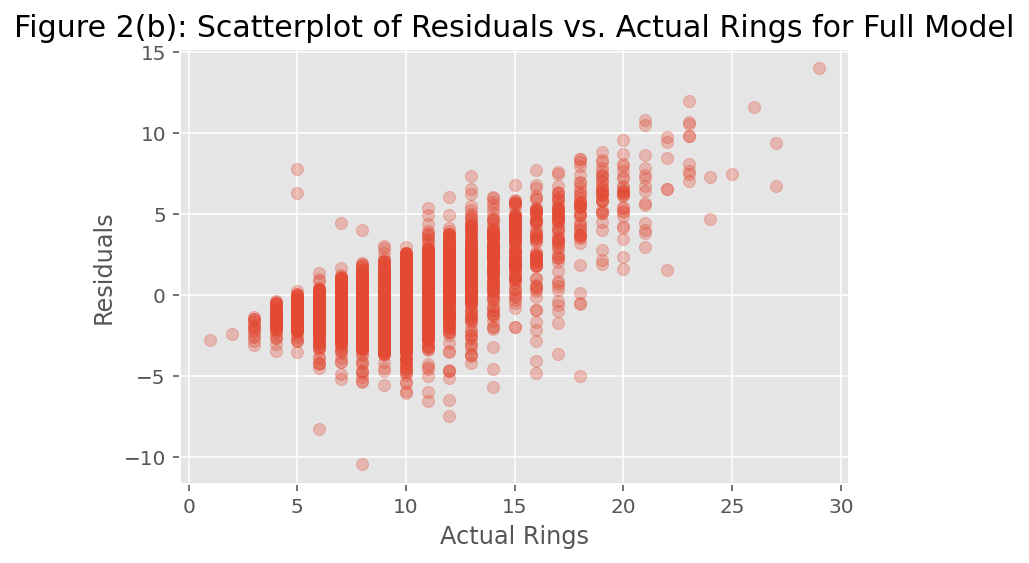

In [10]:
# code sourced from www.featureranking.com
plt.scatter(residuals_full['actual rings'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Actual Rings');
plt.ylabel('Residuals')
plt.title('Figure 2(b): Scatterplot of Residuals vs. Actual Rings for Full Model', fontsize=15)
plt.show();

From Figure 2(b) we can see that the model overestimates lower numbers of rings which can be seen through the negative residuals, below 15 rings. The model can also be seen underestimating for higher number of rings which can be seen through the high, positive residuals for a higher number of rings. 

We will now overlay the histograms of the actual number of rings versus the predicted number of rings on the same plot.

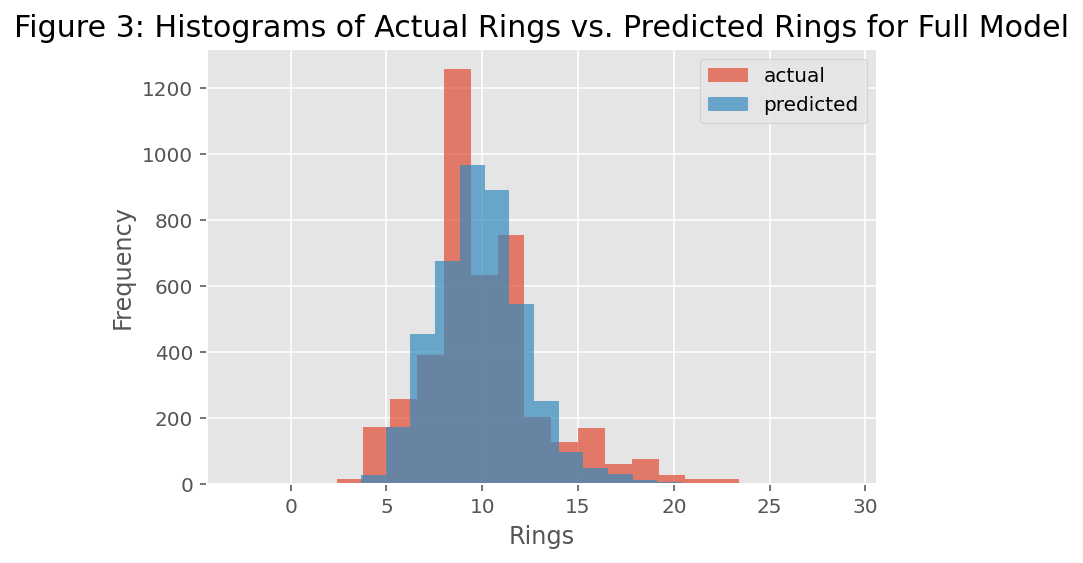

In [11]:
# code sourced from www.featureranking.com
plt.hist(residuals_full['actual rings'], label='actual', bins=20, alpha=0.7);
plt.hist(residuals_full['predicted rings'], label='predicted', bins=20, alpha=0.7);
plt.xlabel('Rings');
plt.ylabel('Frequency');
plt.title('Figure 3: Histograms of Actual Rings vs. Predicted Rings for Full Model', fontsize=15);
plt.legend()
plt.show();

From Figure 3 we can see that the actual and predicted graphs seem to have a similar distribution. However, the actual graph seems to have a significantly higher cluster at around 7-9 rings. Both histograms are also slightly right skewed.

We will now have a look at the histogram of the residuals. 

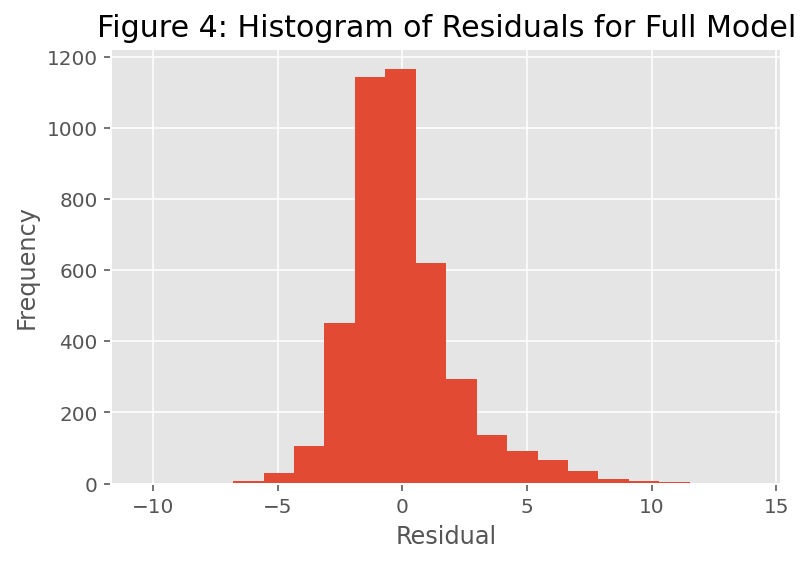

In [12]:
# code sourced from www.featureranking.com
plt.hist(residuals_full['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 4: Histogram of Residuals for Full Model', fontsize=15);
plt.show();


From Figure 4 we can see that the histogram of residuals is slightly right skewed, however, it does still look somewhat symmetric. This suggests that that residuals are nearly normal which means that this condition has not been violated. 

#### Backwards Feature Selection

We now perform backwards feature selection using p-values. This will be done by dropping variables with the highest p-values and then refitting a smaller model.

In [13]:
# code sourced from www.featureranking.com
## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula_string_encoded)

# initialize feature-selected fit to full model
linreg_fit = model_full_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    # uncomment the line below if you would like to see the regression summary
    # in each step:
    ### print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.3f}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=abolone_encoded).fit()
    
###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = abolone_encoded).fit()
###
    
#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.3f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.3f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.3f}")


Performing backwards feature selection using p-values:

Removing term "length" with p-value 0.810

Removing term "gender_M" with p-value 0.491

***
                            OLS Regression Results                            
Dep. Variable:                  rings   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     692.7
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:31:17   Log-Likelihood:                -9200.2
No. Observations:                4175   AIC:                         1.842e+04
Df Residuals:                    4167   BIC:                         1.847e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|   

From the results we can see that `length` and `gender_M` have been removed due to their their high p-values. The reduced model returns an adjusted R-Squared value of 0.537 which is the same as the full model. This suggests that the reduced model still explains around 53.7% of the variance, even though two of the variables were removed. The p-values are now all significant and have a shared value of '0.00'. 

We will now define a new data frame for actual number of rings versus predicted number of rings and the residuals for the reduced model. This is similar to what was done for the full model. 

In [14]:
residuals_reduced = pd.DataFrame({'actual': abolone_encoded['rings'], 
                            'predicted': model_reduced_fitted.fittedvalues, 
                            'residual': model_reduced_fitted.resid})
residuals_reduced.head(10).style.set_precision(3)

,actual,predicted,residual
0,15,9.192,5.808
1,7,7.829,-0.829
2,9,11.122,-2.122
3,10,9.615,0.385
4,7,6.732,0.268
5,8,7.830,0.170
6,20,13.580,6.420
7,16,11.500,4.500
8,9,9.695,-0.695
9,19,13.165,5.835


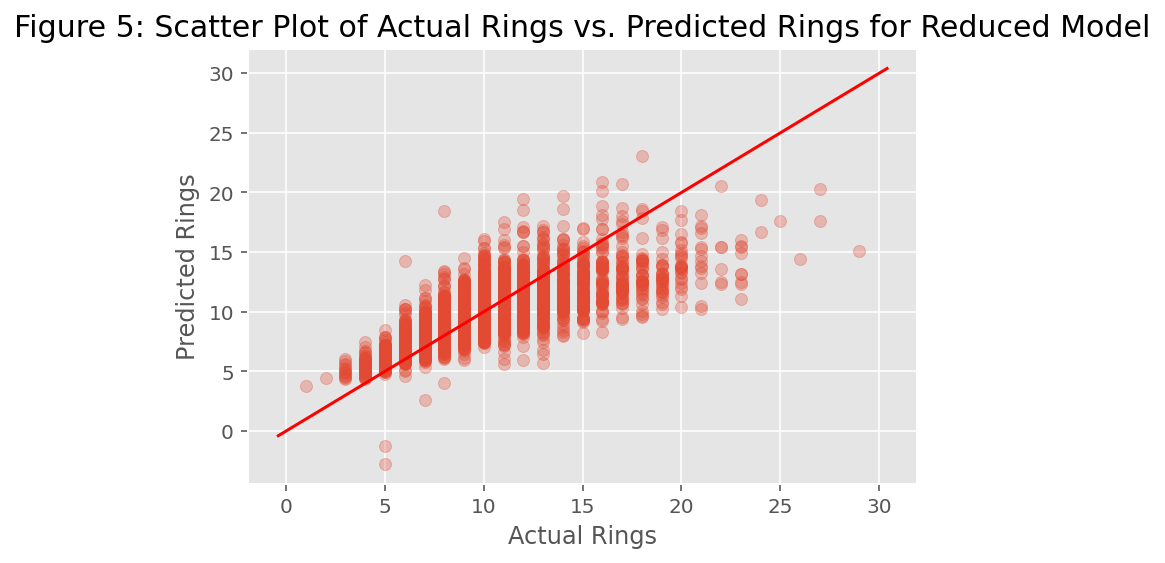

In [15]:
# get a scatter plot
plt.scatter(residuals_reduced['actual'], residuals_reduced['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Rings');
plt.ylabel('Predicted Rings');
plt.title('Figure 5: Scatter Plot of Actual Rings vs. Predicted Rings for Reduced Model', fontsize=15);
plt.show(); 

From Figure 5, we can see that this reduced model still has the same issue as the full model where it overestimates for a small number of rings and underestimates for higher number of rings. The model also still does not predict number of rings over 25. 

We will now perform the diagnostic checks on this reduced model. 

#### Reduced Model Diagnostics Checks

We will now get a scatter plot of the residuals for predicted number of rings.

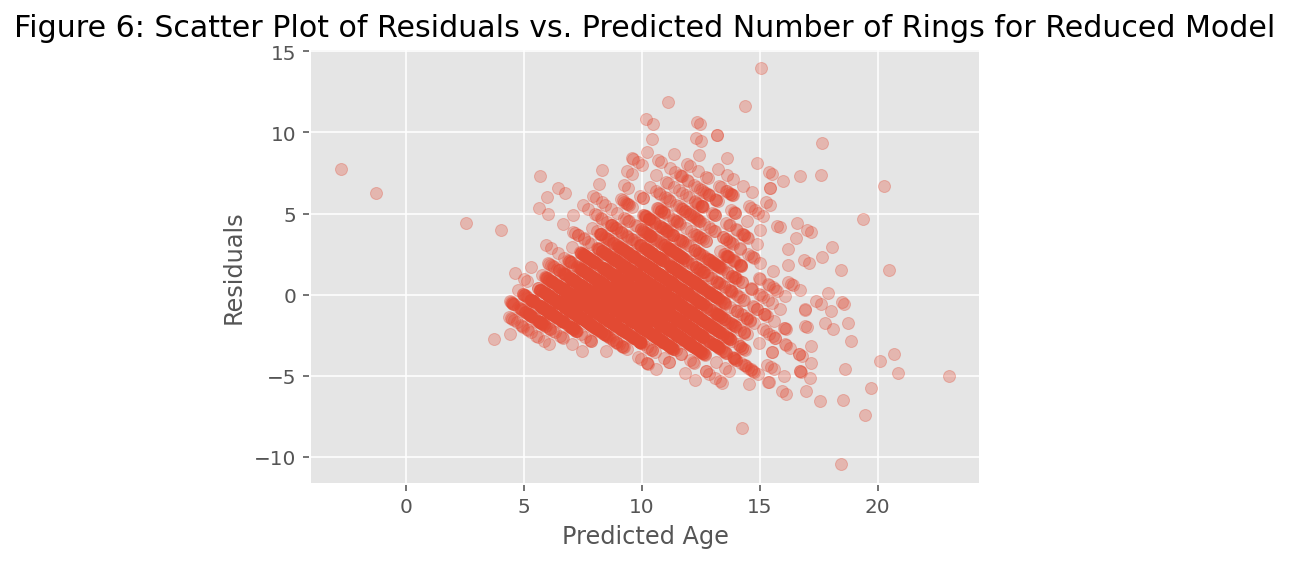

In [16]:
plt.scatter(residuals_reduced['predicted'], residuals_reduced['residual'], alpha=0.3);
plt.xlabel('Predicted Age');
plt.ylabel('Residuals')
plt.title('Figure 6: Scatter Plot of Residuals vs. Predicted Number of Rings for Reduced Model', fontsize=15)
plt.show();

Figure 6 and Figure 2(a) appear to have a similar shape suggesting that the residuals in the full and reduced model have the same banding pattern. This means that  the residuals are not random or centered around 0 indicating the constant variability assumption of linear regression is not satisfied in this case.

We will now look at the histogram of the residuals for the reduced model.

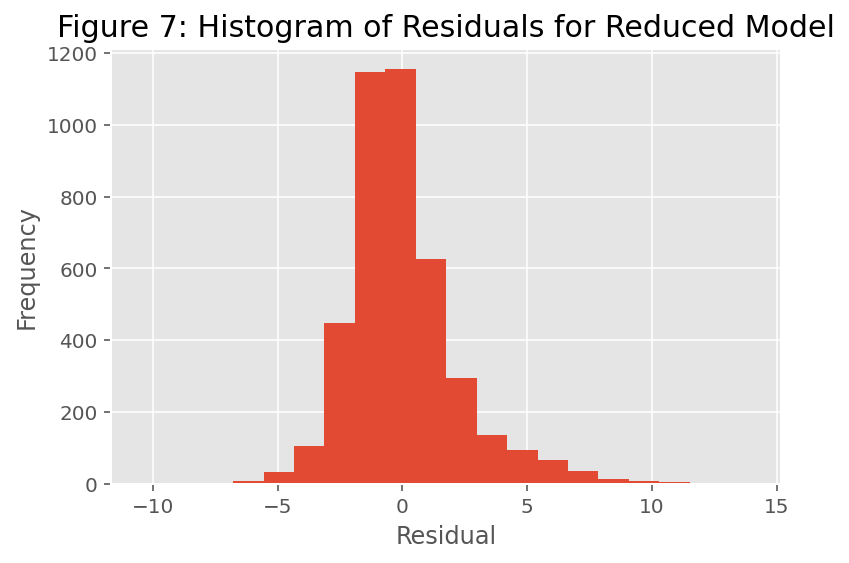

In [17]:
plt.hist(residuals_reduced['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 7: Histogram of Residuals for Reduced Model', fontsize = 15)
plt.show();

The histogram in Figure 7 is similar to the one in Figure 4. There is still a nearly symmetric histogram around zero suggesting that the condition of nearly normal residuals is satisfied. 

## Critique and Limitations <a id='limit'></a>

The final reduced model produced has an adjusted R-Squared value of 0.537 meaning that the model explains around 53.7% of the variability in the number of rings on an abalone. This number is quite low and suggests that this model is not able to predict the number of rings very well which is a limitation of the model. It would be preferable to have a model which has an adjusted R-Squared value that is able to explain at least 70% of the variability in `rings`. For this reason, it may be beneficial to use nonlinear techniques like neural networks to create a more accurate predictive model for abalone age instead of linear regression techniques. A log transformation could potentially be used to increase the adjusted R-Squared value. Another limitation to the model is that it overestimates for a low number of rings and underestimates for a high number of rings. The model is also not able to predict any number of rings above 25, despite the highest number of rings in the dataset being 29. The model also predicts a negative number of rings which is not realistic. The diagnostic checks for the reduced model showed that the condition of residuals having constant variability was not quite satisfied, particularly as the age increases. However, a positive of the model is that the residual histograms do meet their condition of nearly normal residuals as they have a symmetric distribution.

## Summary and Conclusions <a id='summ_conc'></a>

### Project Summary <a id='projectsummary'></a>

During Phase 1 the dataset was first cleaned. The names of the features were changed to be in lowercase and whitespaces were removed. We then checked to see if the `whole_weight` variable was the total of the other weight measurements. After completing the comparison we found that this was not the case and therefore decided to keep the `whole_weight` variable. We then removed a '0.00' value for the feature `height` which was likely an error as a '0.00' height is not possible. 

We then conducted data visualisation to explore the different features. During univariate visualisation a histogram for abalone gender found that majority of the abalone were male with an approximately equal number of females and infants. A box plot and histogram of the response variable `rings` found that this variable is right-skewed with potential outliers. After this, we did two-variable visualisation. Through a scatter plot between `height` and `rings` we found a positive relationship between the two. A box plot  between `rings` and `gender` found that the relationship between rings and gender was similar for males and females. This was different for infants, with their distribution being left skewed, compared to right skewed for males and females. Relationships between different weights to rings was then observed. We found that `viscera_weight` and `shell_weight` had the strongest relationships with the response variable `rings`. Three-variable visualisation was then conducted on the dataset. We wanted to see the relationship between `length`, `gender`, and `rings`. We found a positive relationship between `length` and `rings`. The distributions appeared similar for males and females. The second graph explored the variables `diameter`, `gender`, and `rings`. Like the previous scatter plot, the relationship between the three variables was positive and the distribution for male and female abalone was similar. 

During Phase 2, we used multiple linear regression techniques. We first constructed a regression formula of all the features in the dataset from Phase 1. From here, we performed one-hot encoding on our only categorical variable, `gender`. A new regression formula was then created with the additional features obtained from one-hot encoding. We used this formula to fit an OLS model and found that the adjusted R-Square value was 0.537 and that majority of features had significant p-values. We then created a new data frame for the actual and predicted rings. This data frame was used to see how well this model predicts number of rings by creating a scatter plot to see the relationship between actual versus predicted number of rings. 

We then conducted diagnostic checks on the full model. First, we checked the condition of residuals having constant variability by constructing a scatter plot for residuals versus the predicted rings. We found that the residuals were not random and centered around 0 indicating that this condition was not satisfied. After this, a scatter plot seeing if there was a correlation between residuals and the actual rings was created. We found that the model overestimated for a low number of rings and underestimated for a high number of rings. A histogram was then created to compare the frequency for actual and predicted number of rings. We found that the two graphs had a similar distribution. To check the condition of nearly normal residuals, a histogram was constructed using the residuals for the full model. The distribution appeared to be nearly symmetric so this condition was not violated.

After this, backwards feature selection was conducted to remove any features with insignificant p-values creating the reduced model. During backwards feature selection the variables `length` and `gender_M` were removed. New OLS Regression Results were produced using the reduced model and it was founds that the adjusted R-Squared value had stayed the same. Like the full model, another data frame was created for the actual and predicted rings. Diagnostic checks were then conducted on the reduced model. The condition of residuals having constant variability was checked using a scatter plot of residuals versus predicted rings. Like the full model, this condition was not met. We then checked the condition of nearly normal residuals. This was done by creating a histogram of residuals for the reduced model. Similar to the full model, it was found that this condition was not violated. 

### Summary of Findings <a id='findings'></a>

Using the descriptive features in the full model, we achieved an adjusted R-Squared value of 0.537. This means that 53.7% of the variability in the number of rings on an abalone is explained by the model. We also found that all features had a p-value of 0.00, expect for `length` and `gender_M` which had p-values of 0.810 and 0.490 respectively. From the scatter plot of actual versus predicted rings as shown in Figure 1, we found that there was a positive relationship present. Figure 1 also shows that the model does not provide a predicted value above 25 rings despite the maximum number of rings in the data set being 29. The scatter plot of residuals versus predicted rings in Figure 2(a) shows that the residuals are mainly below 0 for low predicted rings, and as the number of rings increases, the residuals are mainly above 0. This means that the constant variability of residuals condition has been violated. Figure 2(b) shows a scatter plot of residuals versus the actual rings. This scatter plot suggests that the full model overestimates for low numbers of rings which can be seen through the negative residuals, particularly below 15 rings. The model also underestimates for high numbers of rings which can be seen through the large, positive residuals for a higher number of rings. From Figure 3 we can see a histogram of actual rings and predicted rings. We found that both histograms had a similar distribution and were slightly right skewed. It was also observed that the histogram for actual rings had a high cluster around 7-9 rings. The histogram of residuals for the full model, as shown in Figure 4, showed that the residuals have a nearly symmetric distribution. This suggests that the condition for nearly normal residuals has been met. 

Backwards feature selection allows us to remove any features with insignificant p-values, producing a reduced model. The adjusted R-Squared value has stayed the same after backwards feature selection, but without the features `length` and `gender_M`. Our final model has 7 features in total, all with significant p-values of 0.00. Figure 5 depicts a scatter plot of the actual and predicted number of rings for the reduced model. This scatter plot presents the same issues as the one for the full model as it overestimates for low rings and underestimates for high rings. Figure 6, which is a scatter plot of residuals versus predicted rings for the reduced model, shows a similar distribution to Figure 2(a). This means the condition for constant variability of residuals has again been violated. The histogram of residuals as shown in Figure 7 also has a nearly symmetric distribution which is similar to Figure 4. This means that the conditions of nearly normal residuals for the reduced model has been met. 

### Conclusions <a id='conc'></a>

It can be concluded that our goal to create a model to accurately predict abalone age (by adding 1.5 to `rings`) using physical measurements and gender has not been met. This is because the current model only explains 53.7% of the variability in the number of rings, which is used to predict age in the 1994 Abalone data set. This value is considerably low and would be more beneficial and dependable if the adjusted R-Squared value was higher, and therefore able to explain much more of variability. The reduced model is also not able to predict any number of rings above 25, which is not useful as the highest number of rings in the data set is 29. For this reason, marine biologists or sellers of sea food would not likely benefit through the use of this model. If this model is used it will likely overestimate when the number of rings is low, and underestimate when the number of rings is high, leading to inaccurate predictions. 

## References <a id='ref'></a>

* Dua, D. and Graff, C. (2019). UCI Machine Learning Repository: Abalone Data Set (UCI MLR). Retrieved October 17, 2021 from https://archive.ics.uci.edu/ml/datasets/abalone

* Aksakalli, V., Yenice, Z., Wong, Y.K. (2019, August 6). Regression Case Study. Retrieved October 17, from https://www.featureranking.com/tutorials/statistics-tutorials/regression-case-study/